# #Python으로 영어 코퍼스 처리

# < Sentiment analysis process>

step1. 데이터 수집 및 탐색

step2. 전처리
    - Tokenize text (stemming)
    - Tag token (POS, NER)
    - Token selection ( stopword removal)
    - calculate word/docnment similarities, cluster documments

step3. 속성 추출

step4. 기계학습 알고리즘 및 평가

# 용어 

Document : 문서

Corpus - 말뭉치

Token - 토큰 (Meaning elements in a document. words, phrases, sentences..)

POS - 품사  (Part-of-speech ; Nouns ...)




# Text Mining을 위한 Python packages 설치


step1: Install Anaconda3 

step2: NLTK 설치 
    


pip install nltk

nltk.download()

# 1. Document exploration

NLTK에서 제공하는 문서들 또는 다른 텍스트를 로딩 사용



In [1]:
import nltk

In [10]:
from nltk.corpus import gutenberg # Doc from project gutenberg.org
files=gutenberg.fileids() # get file ids
print(files)

doc=gutenberg.open('austen-emma.txt').read()

tok=nltk.sent_tokenize(doc)

print(tok[0]) #sent_tokenize 는 문장별로 구분해서 만들어주는듯, 리스트 형식

type(tok)


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.


list

# 2. Preprocessing

# regular expression: 

    match 1 or more (+)
 
    match 0 or 1 repetitions(?)
 
    match 0 or MORE repetitions (*)
 
    Any character except a new line (.)


# 2-1. Tokenizing words with NLTK

In [11]:
from nltk.tokenize import sent_tokenize, word_tokenize, regexp_tokenize
                   
example_text = """Hello Mr. Smith, how are you doing today? 
The weather is great, and Python is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard."""

print(sent_tokenize(example_text))
print(word_tokenize(example_text))

pattern= r'''[A-Z][a-z]*'''
print(regexp_tokenize(example_text,pattern)) #pattern 안에 들어있는 내용만 걸러내는듯? 레귤러 익스프레션을 제거하는 듯한 느낌

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard."]
['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'Python', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard', '.']
['Hello', 'Mr', 'Smith', 'The', 'Python', 'The', 'You']


# 2-2. Explore Text with NLTK




In [21]:
pattern= r'''[a-z]*.'''
tokens = regexp_tokenize(doc, pattern)
data=nltk.Text(tokens)
print(len(data.tokens)) #returns number of tokens
#print(set(data.tokens)) #returns number of unique tokens
x = data.vocab()  #returns frequency distribution
x.keys()


221827


dict_keys(['[', 'E', 'mma ', 'by ', 'J', 'ane ', 'A', 'usten ', '1', '8', '6', ']', '\n', 'V', 'O', 'L', 'U', 'M', ' ', 'I', 'C', 'H', 'P', 'T', 'R', 'W', 'oodhouse,', 'handsome,', 'clever,', 'and ', 'rich,', 'with ', 'a ', 'comfortable ', 'home\n', 'happy ', 'disposition,', 'seemed ', 'to ', 'unite ', 'some ', 'of ', 'the ', 'best ', 'blessings\n', 'existence;', 'had ', 'lived ', 'nearly ', 'twenty-', 'one ', 'years ', 'in ', 'world\n', 'very ', 'little ', 'distress ', 'or ', 'vex ', 'her.', 'S', 'he ', 'was ', 'youngest ', 'two ', 'daughters ', 'most ', 'affectionate,', 'indulgent ', 'father;', 'had,', 'consequence ', 'her ', "sister'", 's ', 'marriage,', 'been ', 'mistress ', 'his ', 'house ', 'from ', 'early ', 'period.', 'er ', 'mother\n', 'died ', 'too ', 'long ', 'ago ', 'for ', 'have ', 'more ', 'than ', 'an ', 'indistinct\n', 'remembrance ', 'caresses;', 'place ', 'supplied\n', 'excellent ', 'woman ', 'as ', 'governess,', 'who ', 'fallen ', 'short\n', 'mother ', 'affection.', 

 Plot frequency distribution

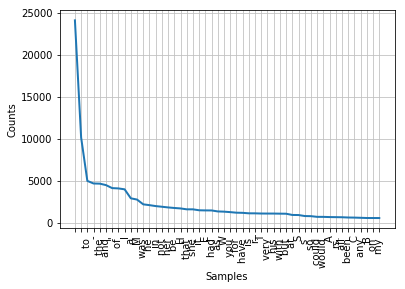

In [22]:
data.plot(50) # Plot sorted frequency of top 10 tokens #빈도수 그래프를 그려줌


# 2-2.Stop words with NLTK 

The process of converting data to something a computer can understand. 

In natural language processing, useless words (data), are referred to as stop words.

In [23]:
from nltk.corpus import stopwords # remove words that just contain no meaning

stop_words=set(stopwords.words('english'))

print(stop_words)

{'couldn', 'haven', 'has', 'you', 'over', 'with', 'themselves', 'through', 'all', 'not', 'this', 'under', 'at', 'didn', 'from', 'after', 'did', 'then', 'wasn', 'about', 'hasn', 'more', 'than', 'can', 'isn', 'hers', 'very', 'out', 'theirs', 'their', 'into', 'she', 'itself', 'our', 'yourself', 'further', 'both', 'having', 'only', 'needn', 'd', 'won', 'other', 'your', 'herself', 'ain', 'me', 'but', 'against', 'we', 'mustn', 'being', 'when', 'above', 'be', 'shouldn', 'yourselves', 'or', 'aren', 'same', 'is', 'most', 'should', 'what', 'too', 'myself', 'a', 'up', 'during', 'now', 'on', 'them', 'himself', 'just', 'down', 'who', 'while', 'been', 'of', 'mightn', 'here', 'his', 'll', 'it', 'doing', 'any', 'again', 'nor', 'shan', 'because', 'weren', 'whom', 't', 'he', 'how', 'does', 'for', 'which', 'don', 'between', 'was', 'ours', 'these', 'until', 'off', 'there', 'each', 'doesn', 've', 'such', 'and', 'if', 'why', 'him', 'had', 'no', 'own', 'are', 'below', 's', 'will', 'am', 'in', 'its', 'm', 'to

# 연습 #1: 주어진 텍스트에서 stop word을 제거하기

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sentence = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))
stop_words.add(".")
stop_words.add(",")

tokens = word_tokenize(sentence)

filtered_sentence = [w for w in tokens if not w in stop_words] #이 부분은 무엇인지?


print(tokens)
print(filtered_sentence)

['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', 'showing', 'stop', 'words', 'filtration']


# 2.3.Stemming words with NLTK

Stemming is a sort of normalizing method. 

Many variations of words carry the same meaning, other than when tense is involved :

Highly redundant and inefficient, especially since, once we convert to numbers, the "value" is going to be identical.

In [33]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()



# 연습 #2 :다음 문장을 stemming하여 그 결과를 출력하기(10분)

new_text = """It is important to by very pythonly while 
you are pythoning with python. All pythoners """

In [34]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
new_text = """It is important to by very pythonly
while you are pythoning with python. All pythoners """
words = word_tokenize(new_text)
ps = PorterStemmer()
stemmed=[ps.stem(w) for w in words]
print(stemmed)


['It', 'is', 'import', 'to', 'by', 'veri', 'pythonli', 'while', 'you', 'are', 'python', 'with', 'python', '.', 'All', 'python']


# 2.4.Part of Speech Tagging and Chunking with NLTK

POS tagging means labeling words in a sentence as nouns, adjectives, verbs...etc. 

Chunking means grouping words into hopefully meaningful chunks. 

One of the main goals of chunking is to group into what are known as "noun phrases." 
 
The idea is to group nouns with the words that are in relation to them.

In [25]:
words = nltk.word_tokenize("The little yellow dog barked at the Persian cat")
tagged = nltk.pos_tag(words)
tagged


[('The', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Persian', 'JJ'),
 ('cat', 'NN')]

In [26]:
chunkGram = r"""NP: {<DT>? <JJ>? <NN.*>* }"""
chunkParser = nltk.RegexpParser(chunkGram)

chunked = chunkParser.parse(tagged)

print(chunked)


chunked.draw()     


(S
  (NP The/DT little/JJ)
  (NP yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT Persian/JJ cat/NN))


# 연습 #3 :다음 코퍼스을 Tagging & Chunking하여 정보 추출하기(10분)

Extract special characters using NLTK RegexpParser Chunk for POS_tagged words 

In [38]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

print(tokenized[1])

words = nltk.word_tokenize(tokenized[1]) #tokenizing

tagged = nltk.pos_tag(words) #tagging


chunkGram = r"""NP: {<DT>? <JJ>? <NN.*>* }""" #regular expression 
                                  
chunkParser = nltk.RegexpParser(chunkGram)
chunked = chunkParser.parse(tagged) #chunking with nouns
            
print(chunked)

chunked.draw()



Mr. Speaker, Vice President Cheney, members of Congress, members of the Supreme Court and diplomatic corps, distinguished guests, and fellow citizens: Today our nation lost a beloved, graceful, courageous woman who called America to its founding ideals and carried on a noble dream.
(S
  (NP Mr./NNP Speaker/NNP)
  ,/,
  (NP Vice/NNP President/NNP Cheney/NNP)
  ,/,
  (NP members/NNS)
  of/IN
  (NP Congress/NNP)
  ,/,
  (NP members/NNS)
  of/IN
  (NP the/DT Supreme/NNP Court/NNP)
  and/CC
  (NP diplomatic/JJ corps/NN)
  ,/,
  (NP distinguished/JJ guests/NNS)
  ,/,
  and/CC
  (NP fellow/JJ citizens/NNS)
  :/:
  Today/VB
  our/PRP$
  (NP nation/NN)
  lost/VBD
  (NP a/DT)
  beloved/VBN
  ,/,
  (NP graceful/JJ)
  ,/,
  (NP courageous/JJ woman/NN)
  who/WP
  called/VBD
  (NP America/NNP)
  to/TO
  its/PRP$
  (NP founding/NN ideals/NNS)
  and/CC
  carried/VBD
  on/IN
  (NP a/DT noble/JJ dream/NN)
  ./.)


In [39]:
data=nltk.Text(words)  

print(len(data.tokens))  # returns number of tokens (document length)

print(len(set(tokens))) # returns number of unique tokens

data.vocab() # returns frequency distribution

data.plot(15)  # Plot sorted frequency of top 50 tokens

data.count('PRESIDENT')  # Counts occurrences

data.concordance('a', lines=2)

data.collocations()

52
13
Displaying 2 of 2 matches:
ellow citizens : Today our nation lost a beloved , graceful , courageous woman 
 to its founding ideals and carried on a noble dream .



# 2.5. Named Entity Recognition with NLTK

One of the most major forms of chunking in natural language processing is called "Named Entity Recognition." The idea is to have the machine immediately be able to pull out "entities" like people, places, things, locations, monetary figures, and more.




In [40]:
import nltk
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer

train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

words = nltk.word_tokenize(tokenized[0])
tagged = nltk.pos_tag(words)
namedEnt = nltk.ne_chunk(tagged, binary=False)
namedEnt.draw()






# 2.6. Lemmatizing with NLTK

A very similar operation to stemming 

Stemming can often create non-existent words, whereas lemmas are actual words.

Root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but look up a lemma.

Parameter, "pos." If not supplied, the default is "noun." 

In [41]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

cat
cactus
goose
rock
python
good
best
run
run


# #Wordnet with NLTK

Wordnet is a collection of words, definitions, examples of their use, synonyms, antonyms, and more.

https://wordnet.princeton.edu/wordnet/

WordNet is a lexical database for the English language, which was created by Princeton, and is part of the NLTK corpus. 

You can use WordNet alongside the NLTK module to find the meanings of words, synonyms, antonyms, and more.


In [43]:
from nltk.corpus import wordnet

In [49]:
syns=wordnet.synsets("program") #An example of a synset:
print(syns)
print(syns[0].name()) 

print(syns[0].lemmas()[0].name()) #just the word

print(syns[0].definition()) # definition of the first synset

[Synset('plan.n.01'), Synset('program.n.02'), Synset('broadcast.n.02'), Synset('platform.n.02'), Synset('program.n.05'), Synset('course_of_study.n.01'), Synset('program.n.07'), Synset('program.n.08'), Synset('program.v.01'), Synset('program.v.02')]
plan.n.01
plan
a series of steps to be carried out or goals to be accomplished


Next, how might we discern synonyms and antonyms to a word? The lemmas will be synonyms, and then you can use .antonyms to find the antonyms to the lemmas. 

문법:

list=[]

for x in range(10):
    list.append(x)
    
print(set(list))

In [50]:
synonyms = []
antonyms = []

for syn in wordnet.synsets("good"):
    for x in syn.lemmas():
        synonyms.append(x.name())
        if x.antonyms():
            antonyms.append(x.antonyms()[0].name())

print(set(synonyms))
print(set(antonyms))

{'expert', 'beneficial', 'in_effect', 'near', 'thoroughly', 'salutary', 'sound', 'adept', 'dependable', 'right', 'in_force', 'safe', 'full', 'estimable', 'skillful', 'dear', 'skilful', 'undecomposed', 'proficient', 'honorable', 'unspoiled', 'effective', 'soundly', 'unspoilt', 'trade_good', 'ripe', 'secure', 'commodity', 'honest', 'upright', 'goodness', 'practiced', 'respectable', 'just', 'serious', 'well', 'good'}
{'evilness', 'bad', 'evil', 'badness', 'ill'}


use WordNet to compare the similarity of two words and their tenses, by incorporating the Wu and Palmer method for semantic related-ness.

 compare the noun of "ship" and "boat:"

In [51]:
w1 = wordnet.synset('ship.n.01')
w2 = wordnet.synset('boat.n.01')
print(w1.wup_similarity(w2))

0.9090909090909091


# # Text Classification with NLTK : Movie reviewer

The goal with text classification can be pretty broad.

Maybe we're trying to classify text as about politics or the military. 

Maybe we're trying to classify it by the gender of the author who wrote it. 

A fairly popular text classification task is to identify a body of text as either spam or not spam, for things like email filters.

we're going to try to create a sentiment analysis algorithm with customer reviewers

To do this, 

1. start by trying to use the movie reviews database that is part of the NLTK corpus. 

2. use words as "features" which are a part of either a positive or negative movie review. 

3. the NLTK corpus movie_reviews data set has the reviews, and they are labeled already as positive or negative. 

4. train and test with this data. 

In [52]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [[movie_reviews.words(fileid), category]
             for category in movie_reviews.categories()
             #if category=='pos'
             for fileid in movie_reviews.fileids(category)]


random.shuffle(documents)

print(documents[1])

all_words = []

for w in movie_reviews.words():
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

print(all_words.most_common(15))
print(all_words["terrible"])

[['i', 'had', 'been', 'looking', 'forward', 'to', ...], 'neg']
[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]
143


# 1.Converting words to Features with NLTK

In [54]:
print(all_words)

word_features=[w for w in all_words][:3000] #set word_features, which contains the top 3,000 most common words.
 
#print(word_features)

<FreqDist with 39768 samples and 1583820 outcomes>


In [56]:
def find_features(document):   # find these top 3,000 words in our positive and negative documents, 
                               #marking their presence as either positive or negative:
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

#print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))


In [57]:
# do this for all of our documents, 
# saving the feature existence booleans 
#  and their respective positive or negative categories 
featuresets = [(find_features(rev), category) for (rev, category) in documents] 
                      

# 2. Supervised Machine learning 



1.Chose an algorithm : the Naive Bayes classifier. This is a pretty popular algorithm used in text classification, so it is only fitting that we try it out first. 

2.Separate our data into training and testing sets

3. To do this :

Shuffle our data se

Assign the first 1,900 shuffled reviews, consisting of both positive and negative reviews, as the training set. 

Then, test against the last 100 to see how accurate we are.

This is called supervised machine learning, because we're showing the machine data, and telling it "hey, this data is positive," or "this data is negative." Then, after that training is done, we show the machine some new data and ask the computer, based on what we taught the computer before, what the computer thinks the category of the new data is.


In [58]:
training_set = featuresets[:1900] # set that we'll train our classifier with

testing_set = featuresets[1900:] # set that we'll test against.

In [59]:
classifier = nltk.NaiveBayesClassifier.train(training_set) # train our classifier like:

In [60]:
classifier.show_most_informative_features(20) #see what the most valuable words are when it comes to positive or negative reviews:

Most Informative Features
              astounding = True              pos : neg    =     12.3 : 1.0
             outstanding = True              pos : neg    =     10.9 : 1.0
               stupidity = True              neg : pos    =      9.1 : 1.0
                  feeble = True              neg : pos    =      8.4 : 1.0
                 frances = True              pos : neg    =      8.3 : 1.0
               behaviour = True              pos : neg    =      7.6 : 1.0
                  crappy = True              neg : pos    =      7.0 : 1.0
                 supreme = True              pos : neg    =      7.0 : 1.0
                    moss = True              pos : neg    =      6.3 : 1.0
                 notions = True              pos : neg    =      5.6 : 1.0
                  justin = True              neg : pos    =      5.4 : 1.0
                 lambert = True              neg : pos    =      5.0 : 1.0
                  farley = True              neg : pos    =      5.0 : 1.0

# Saving Classifiers with NLTK

 no longer need to train our classifier every time we wanted to use it to classify.

In [61]:
import pickle
save_classifier = open("naivebayes.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

classifier_f = open("naivebayes.pickle", "rb")
classifier = pickle.load(classifier_f)
classifier_f.close()

#  Toy Data for sentiment analysis with NLTK

https://pythonprogramming.net/static/downloads/short_reviews/

In [62]:
import nltk
from nltk.tokenize import word_tokenize
import random
short_pos = open("positive.txt","r").read()
short_neg = open("negative.txt","r").read()

documents = []

for r in short_pos.split('\n'):
    documents.append( (r, "pos") )

for r in short_neg.split('\n'):
    documents.append( (r, "neg") )


all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())

for w in short_neg_words:
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

convert words to features

In [63]:
word_features=[w for w in all_words][:5000]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)

In [64]:
# positive data example:      
training_set = featuresets[:10000]
testing_set =  featuresets[10000:]


# #A module for Sentiment Analysis with NLTK

In [65]:
import nltk
import random
#from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize



class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
    
short_pos = open("positive.txt","r").read()
short_neg = open("negative.txt","r").read()

# move this up here
all_words = []
documents = []


#  j is adject, r is adverb, and v is verb
#allowed_word_types = ["J","R","V"]
allowed_word_types = ["J"]

for p in short_pos.split('\n'):
    documents.append( (p, "pos") )
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

    
for p in short_neg.split('\n'):
    documents.append( (p, "neg") )
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())



save_documents = open("documents.pickle","wb")
pickle.dump(documents, save_documents)
save_documents.close()


all_words = nltk.FreqDist(all_words)


word_features = list(all_words.keys())[:5000]


save_word_features = open("word_features5k.pickle","wb")
pickle.dump(word_features, save_word_features)
save_word_features.close()


def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]

save_featuresets = open("featuresets.pickle","wb")
pickle.dump(featuresets, save_featuresets)
save_featuresets.close()

random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]


classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

###############
save_classifier = open("originalnaivebayes5k.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

save_classifier = open("MNB_classifier5k.pickle","wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

save_classifier = open("BernoulliNB_classifier5k.pickle","wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

save_classifier = open("LogisticRegression_classifier5k.pickle","wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()


LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

save_classifier = open("LinearSVC_classifier5k.pickle","wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()


##NuSVC_classifier = SklearnClassifier(NuSVC())
##NuSVC_classifier.train(training_set)
##print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)


SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
print("SGDClassifier accuracy percent:",nltk.classify.accuracy(SGDC_classifier, testing_set)*100)

save_classifier = open("SGDC_classifier5k.pickle","wb")
pickle.dump(SGDC_classifier, save_classifier)
save_classifier.close()

10663
Original Naive Bayes Algo accuracy percent: 73.7556561085973
Most Informative Features
              engrossing = True              pos : neg    =     21.0 : 1.0
               wonderful = True              pos : neg    =     20.3 : 1.0
                 routine = True              neg : pos    =     16.4 : 1.0
                 generic = True              neg : pos    =     15.7 : 1.0
               inventive = True              pos : neg    =     15.0 : 1.0
                  boring = True              neg : pos    =     13.0 : 1.0
                    warm = True              pos : neg    =     13.0 : 1.0
                intimate = True              pos : neg    =     13.0 : 1.0
                mindless = True              neg : pos    =     11.7 : 1.0
                   stale = True              neg : pos    =     11.7 : 1.0
              refreshing = True              pos : neg    =     11.6 : 1.0
                  stupid = True              neg : pos    =     11.0 : 1.0
       

In [66]:
%%writefile sentiment_mod.py
#File: sentiment_mod.py

import nltk
import random
#from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize



class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf


documents_f = open("documents.pickle", "rb")
documents = pickle.load(documents_f)
documents_f.close()




word_features5k_f = open("word_features5k.pickle", "rb")
word_features = pickle.load(word_features5k_f)
word_features5k_f.close()


def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features



featuresets_f = open("featuresets.pickle", "rb")
featuresets = pickle.load(featuresets_f)
featuresets_f.close()

random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]



open_file = open("originalnaivebayes5k.pickle", "rb")
classifier = pickle.load(open_file)
open_file.close()


open_file = open("MNB_classifier5k.pickle", "rb")
MNB_classifier = pickle.load(open_file)
open_file.close()



open_file = open("BernoulliNB_classifier5k.pickle", "rb")
BernoulliNB_classifier = pickle.load(open_file)
open_file.close()


open_file = open("LogisticRegression_classifier5k.pickle", "rb")
LogisticRegression_classifier = pickle.load(open_file)
open_file.close()


open_file = open("LinearSVC_classifier5k.pickle", "rb")
LinearSVC_classifier = pickle.load(open_file)
open_file.close()


open_file = open("SGDC_classifier5k.pickle", "rb")
SGDC_classifier = pickle.load(open_file)
open_file.close()




voted_classifier = VoteClassifier(
                                  classifier,
                                  LinearSVC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)




def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

Overwriting sentiment_mod.py
